## Gabriella Pinheiro

In [ ]:
# --------------------------------------------------------------
# Trabalho Final - Métodos e Ferramentas de Data Science
# Análise das finanças pessoais dos moradores de São Paulo
# --------------------------------------------------------------

# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------------------
# Carregamento da base de dados
# -------------------------------------------------------------

# Leitura do arquivo Excel com os dados da pesquisa
dados = pd.read_excel("dados_trab_final.xlsx")  
dados.head()  # Exibe as primeiras linhas do DataFrame para verificar os dados
dados.info()  # Exibe informações gerais sobre o DataFrame, como tipos de dados e valores nulos



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            600 non-null    int64  
 1   Idade         600 non-null    int64  
 2   Sexo          600 non-null    object 
 3   Renda         600 non-null    object 
 4   Escolaridade  600 non-null    object 
 5   Q1            600 non-null    int64  
 6   Q2            600 non-null    int64  
 7   Q3            600 non-null    int64  
 8   Q4            600 non-null    int64  
 9   Q5            600 non-null    int64  
 10  Q6            600 non-null    int64  
 11  Conh_fin      600 non-null    int64  
 12  Alfab_fin     600 non-null    float64
 13  Seg_fin       600 non-null    float64
 14  Stress_fin    600 non-null    float64
dtypes: float64(3), int64(9), object(3)
memory usage: 70.4+ KB


In [31]:
# --------------------------------------------------------------
# A. ESTATÍSTICAS DESCRITIVAS DA BASE DE DADOS
# --------------------------------------------------------------

# Neste passo, calculamos medidas de posição (média, mínimo, Q1, mediana, Q3 e máximo)
# e medidas de dispersão (amplitude e desvio padrão) para as variáveis quantitativas da base.

# --------------------------------------------------------------
# Variáveis quantitativas da base:
# São aquelas que têm natureza numérica contínua ou discreta com muitos valores distintos,
# permitindo operações como média, desvio padrão e correlação.
#
# Com base na descrição e análise da base, as variáveis quantitativas são:
# 1. Idade         – idade do respondente (número inteiro)
# 2. Conh_fin      – conhecimento financeiro (escala de 0 a 7)
# 3. Alfab_fin     – alfabetização financeira (escala de 0 a 10)
# 4. Seg_fin       – percepção de segurança financeira (escala de 0 a 10)
# 5. Stress_fin    – percepção de estresse financeiro (escala de 0 a 10)
#
# As variáveis Q1 a Q6, apesar de numéricas (0 ou 1), são categóricas binárias e
# não devem ser incluídas nas estatísticas quantitativas (são analisadas via frequências).
# --------------------------------------------------------------

# Lista das variáveis quantitativas
variaveis_quant = ['Idade', 'Conh_fin', 'Alfab_fin', 'Seg_fin', 'Stress_fin']

# Usamos o método describe() para obter estatísticas descritivas das variáveis numéricas
desc_stats = dados[variaveis_quant].describe(percentiles=[.25, .5, .75]).T

# Adicionamos a amplitude manualmente: máximo - mínimo
desc_stats["amplitude"] = desc_stats["max"] - desc_stats["min"]

# Renomeamos colunas para português
desc_stats = desc_stats.rename(columns={
    "mean": "média",
    "std": "desvio_padrão",
    "min": "mínimo",
    "25%": "Q1",
    "50%": "mediana",
    "75%": "Q3",
    "max": "máximo"
})

# Exibimos a tabela com as estatísticas formatadas
print("Estatísticas descritivas das variáveis quantitativas:\n")
print(desc_stats[['média', 'mínimo', 'Q1', 'mediana', 'Q3', 'máximo', 'amplitude', 'desvio_padrão']])


# --------------------------------------------------------------
# Frequências absolutas e relativas das variáveis qualitativas
# --------------------------------------------------------------

# As variáveis qualitativas da base são aquelas que representam categorias ou grupos,
# como sexo, renda e escolaridade. Elas são do tipo nominal ou ordinal e devem ser
# analisadas por meio de frequências (número de ocorrências).

# Variáveis qualitativas da base:
# - Sexo: masculino / feminino
# - Renda: baixa / média / alta
# - Escolaridade: ensino fundamental / médio / superior

# Definimos as variáveis qualitativas
variaveis_qual = ['Sexo', 'Renda', 'Escolaridade']

# Para cada variável qualitativa, exibimos:
# - Frequência absoluta: número de ocorrências de cada categoria
# - Frequência relativa: proporção de cada categoria em relação ao total (em %)
for var in variaveis_qual:
    print(f"\nFrequência da variável: {var}")
    print("Frequência absoluta:")
    print(dados[var].value_counts())
    print("Frequência relativa:")
    print(dados[var].value_counts(normalize=True).round(3))





Estatísticas descritivas das variáveis quantitativas:

                média  mínimo    Q1  mediana    Q3  máximo  amplitude  \
Idade       35.901667    25.0  31.0     36.0  41.0    49.0       24.0   
Conh_fin     4.161667     0.0   3.0      4.0   6.0     7.0        7.0   
Alfab_fin    5.853500     1.1   4.3      6.0   7.3     9.9        8.8   
Seg_fin      5.664000     2.0   4.0      5.6   7.2    10.0        8.0   
Stress_fin   5.199333     2.0   3.6      5.2   6.4    10.0        8.0   

            desvio_padrão  
Idade            5.942012  
Conh_fin         1.993026  
Alfab_fin        2.000756  
Seg_fin          2.169366  
Stress_fin       1.907021  

Frequência da variável: Sexo
Frequência absoluta:
Sexo
feminino     328
masculino    272
Name: count, dtype: int64
Frequência relativa:
Sexo
feminino     0.547
masculino    0.453
Name: proportion, dtype: float64

Frequência da variável: Renda
Frequência absoluta:
Renda
baixa    271
media    182
alta     147
Name: count, dtype: int64
Fr

In [32]:
# --------------------------------------------------------------
# B. MATRIZ DE CORRELAÇÃO ENTRE VARIÁVEIS QUANTITATIVAS
# --------------------------------------------------------------

# Importante: só utilizamos variáveis quantitativas contínuas ou discretas
# Neste caso, as variáveis escolhidas foram:
# - Idade: idade do participante (discreta)
# - Conh_fin: conhecimento financeiro (escala de 0 a 7)
# - Alfab_fin: alfabetização financeira (escala de 0 a 10)
# - Seg_fin: percepção de segurança financeira (escala de 0 a 10)
# - Stress_fin: percepção de estresse financeiro (escala de 0 a 10)

# Lista das variáveis quantitativas da base
variaveis_quant = ['Idade', 'Conh_fin', 'Alfab_fin', 'Seg_fin', 'Stress_fin']

# Calculamos a matriz de correlação de Pearson entre essas variáveis
matriz_correlacao = dados[variaveis_quant].corr()

# Exibimos a matriz de correlação em formato tabular
print("Matriz de correlação entre variáveis quantitativas:\n")
print(matriz_correlacao)

# --------------------------------------------------------------
# INTERPRETAÇÃO DOS RESULTADOS:
# --------------------------------------------------------------
# A correlação varia entre -1 e 1:
# - Correlação positiva próxima de 1 indica forte associação direta.
# - Correlação negativa próxima de -1 indica forte associação inversa.
# - Valores próximos de 0 indicam ausência de correlação linear.

# Exemplos típicos de análise:
# - Alfab_fin vs Seg_fin → geralmente alta correlação positiva (quem entende mais sente-se mais seguro).
# - Stress_fin costuma ter correlação negativa com Seg_fin e Alfab_fin (mais segurança ou alfabetização → menos estresse).
# - Idade costuma ter baixa correlação com essas percepções subjetivas.


Matriz de correlação entre variáveis quantitativas:

               Idade  Conh_fin  Alfab_fin   Seg_fin  Stress_fin
Idade       1.000000  0.076341  -0.025746 -0.026294    0.016731
Conh_fin    0.076341  1.000000   0.108397  0.103247   -0.047586
Alfab_fin  -0.025746  0.108397   1.000000  0.833047   -0.120018
Seg_fin    -0.026294  0.103247   0.833047  1.000000   -0.105878
Stress_fin  0.016731 -0.047586  -0.120018 -0.105878    1.000000


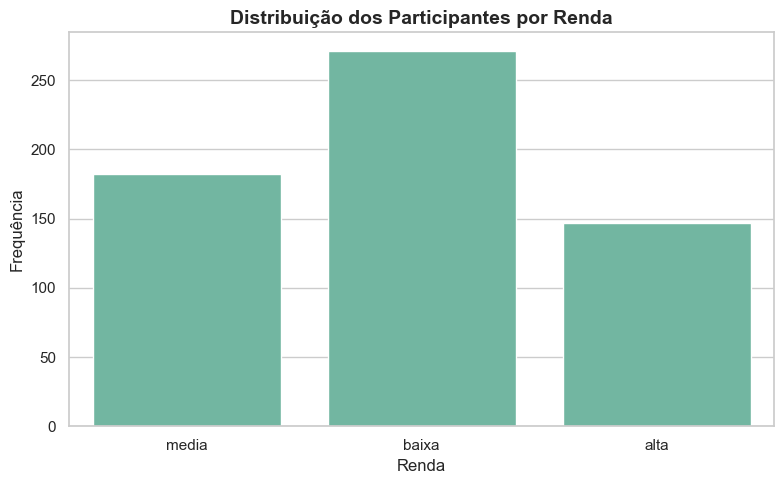


Interpretação econômica - Renda:
A maioria dos participantes possui renda baixa, o que pode indicar vulnerabilidade financeira.
Isso sugere possíveis dificuldades para poupança, acesso ao crédito e estabilidade econômica.


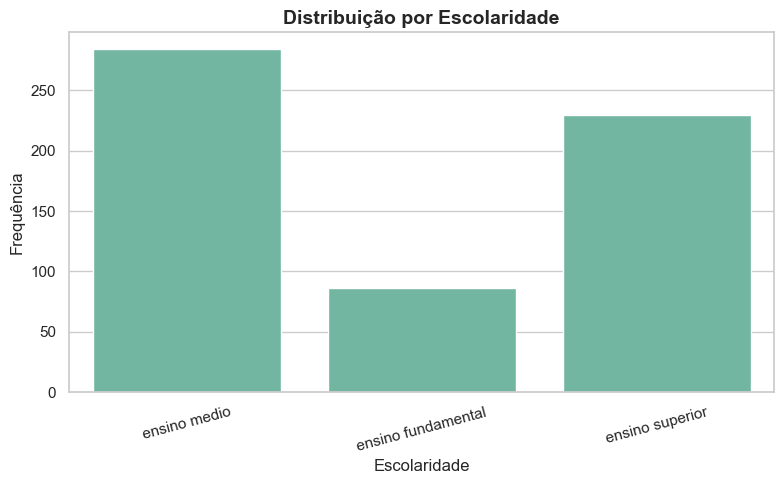


Interpretação econômica - Escolaridade:
A maioria dos participantes tem ensino médio, seguido do superior.
A escolaridade pode influenciar diretamente a capacidade de entender e lidar com temas financeiros.


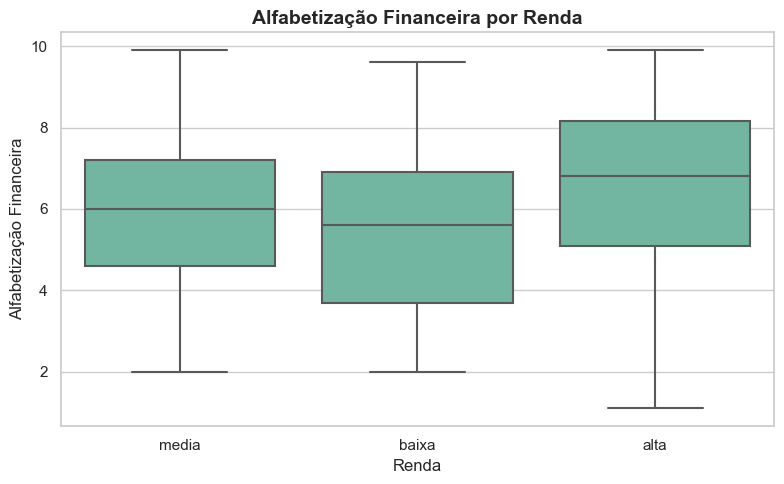


Interpretação econômica - Alfabetização x Renda:
Participantes com renda alta apresentam maior alfabetização financeira.
Isso indica que pessoas com mais recursos tendem a ter maior acesso a conhecimento e educação financeira.


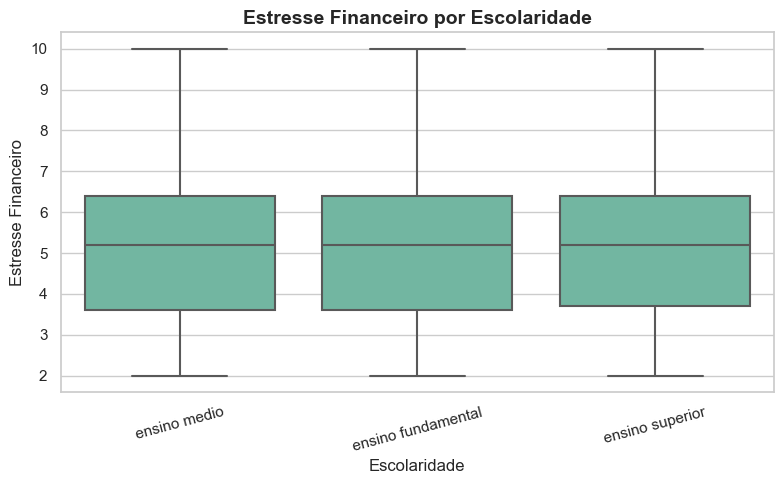


Interpretação econômica - Estresse x Escolaridade:
Participantes com menor escolaridade tendem a apresentar maior estresse financeiro.
Isso pode estar relacionado à menor capacidade de planejamento e maior exposição a dificuldades econômicas.


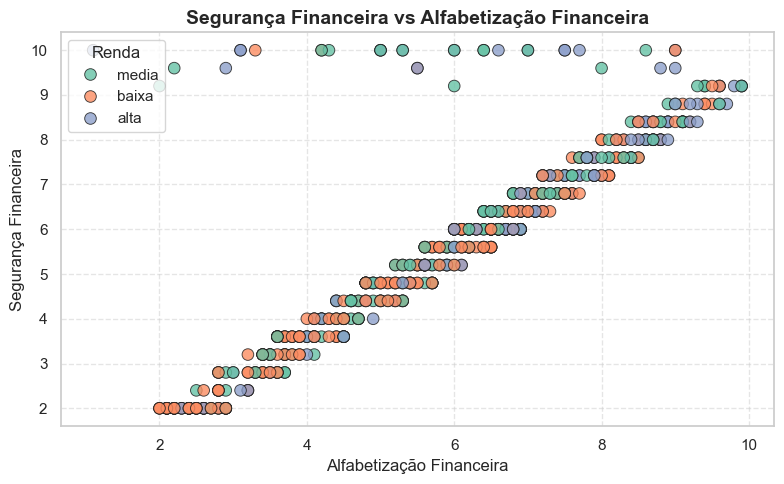


Interpretação econômica - Segurança x Alfabetização:
Há uma relação positiva clara: quanto maior a alfabetização financeira, maior a sensação de segurança.
Além disso, participantes com maior renda tendem a reunir mais conhecimento e maior estabilidade financeira.


In [33]:
# --------------------------------------------------------------
# C. VISUALIZAÇÕES: 2 diagramas de barras, 2 boxplots e 1 dispersão
# --------------------------------------------------------------


# Estilo visual
sns.set(style="whitegrid", palette="Set2")

# --------------------------------------------------------------
# 1. Diagrama de barras — Distribuição da Renda
# Mostra a frequência de participantes por faixa de renda
# --------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=dados, x='Renda')
plt.title("Distribuição dos Participantes por Renda", fontsize=14, weight='bold')
plt.xlabel("Renda")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

print("\nInterpretação econômica - Renda:")
print("A maioria dos participantes possui renda baixa, o que pode indicar vulnerabilidade financeira.")
print("Isso sugere possíveis dificuldades para poupança, acesso ao crédito e estabilidade econômica.")

# --------------------------------------------------------------
# 2. Diagrama de barras — Distribuição por Escolaridade
# Mostra o nível de escolaridade dos respondentes
# --------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=dados, x='Escolaridade')
plt.title("Distribuição por Escolaridade", fontsize=14, weight='bold')
plt.xlabel("Escolaridade")
plt.ylabel("Frequência")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print("\nInterpretação econômica - Escolaridade:")
print("A maioria dos participantes tem ensino médio, seguido do superior.")
print("A escolaridade pode influenciar diretamente a capacidade de entender e lidar com temas financeiros.")

# --------------------------------------------------------------
# 3. Boxplot — Alfabetização Financeira por Renda
# Compara o nível de alfabetização financeira entre grupos de renda
# --------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='Renda', y='Alfab_fin', linewidth=1.5)
plt.title("Alfabetização Financeira por Renda", fontsize=14, weight='bold')
plt.xlabel("Renda")
plt.ylabel("Alfabetização Financeira")
plt.tight_layout()
plt.show()

print("\nInterpretação econômica - Alfabetização x Renda:")
print("Participantes com renda alta apresentam maior alfabetização financeira.")
print("Isso indica que pessoas com mais recursos tendem a ter maior acesso a conhecimento e educação financeira.")

# --------------------------------------------------------------
# 4. Boxplot — Estresse Financeiro por Escolaridade
# Avalia o estresse financeiro médio em cada grupo de escolaridade
# --------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='Escolaridade', y='Stress_fin', linewidth=1.5)
plt.title("Estresse Financeiro por Escolaridade", fontsize=14, weight='bold')
plt.xlabel("Escolaridade")
plt.ylabel("Estresse Financeiro")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

print("\nInterpretação econômica - Estresse x Escolaridade:")
print("Participantes com menor escolaridade tendem a apresentar maior estresse financeiro.")
print("Isso pode estar relacionado à menor capacidade de planejamento e maior exposição a dificuldades econômicas.")

# --------------------------------------------------------------
# 5. Dispersão — Segurança Financeira vs Alfabetização
# Analisa a relação entre segurança percebida e alfabetização financeira
# --------------------------------------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dados, x='Alfab_fin', y='Seg_fin', hue='Renda', s=70, alpha=0.8, edgecolor='k')
plt.title("Segurança Financeira vs Alfabetização Financeira", fontsize=14, weight='bold')
plt.xlabel("Alfabetização Financeira")
plt.ylabel("Segurança Financeira")
plt.legend(title="Renda", loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("\nInterpretação econômica - Segurança x Alfabetização:")
print("Há uma relação positiva clara: quanto maior a alfabetização financeira, maior a sensação de segurança.")
print("Além disso, participantes com maior renda tendem a reunir mais conhecimento e maior estabilidade financeira.")


In [ ]:
# --------------------------------------------------------------
# D. ANÁLISE ENTRE GRUPOS COM USO DA FUNÇÃO groupby()
# --------------------------------------------------------------

# Objetivo: Verificar se pessoas que já tentaram planejar a aposentadoria (Q2 = 1)
# apresentam maior alfabetização financeira (Alfab_fin) do que aquelas que nunca tentaram (Q2 = 0)

# Agrupar os dados com base em Q2 e calcular a média de Alfab_fin
analise_aposentadoria = dados.groupby("Q2")["Alfab_fin"].mean().reset_index()

# Renomear as colunas para melhor leitura
analise_aposentadoria.columns = ['Planejou_Aposentadoria', 'Media_Alfabetizacao_Financeira']

# Exibir os resultados
print("\nMédia de alfabetização financeira por tentativa de planejamento da aposentadoria (Q2):\n")
print(analise_aposentadoria)

# Interpretação econômica com base no resultado
print("\nInterpretação econômica com base no resultado obtido:")
print("A média de alfabetização financeira entre pessoas que **não tentaram planejar a aposentadoria** (Q2 = 0)")
print("é de aproximadamente 5.63. Já entre aquelas que **tentaram** (Q2 = 1), a média sobe para 6.39.")
print("Essa diferença indica que pessoas com maior alfabetização financeira têm mais propensão")
print("a adotar comportamentos de planejamento de longo prazo, como pensar na aposentadoria.")
print("Ou seja, o conhecimento financeiro influencia diretamente a capacidade de antecipar o futuro e agir com responsabilidade.")




Média de alfabetização financeira por tentativa de planejamento da aposentadoria (Q2):

   Planejou_Aposentadoria  Media_Alfabetizacao_Financeira
0                       0                        5.632000
1                       1                        6.391429

Interpretação econômica com base no resultado obtido:
A média de alfabetização financeira entre pessoas que **não tentaram planejar a aposentadoria** (Q2 = 0)
é de aproximadamente 5.63. Já entre aquelas que **tentaram** (Q2 = 1), a média sobe para 6.39.
Essa diferença indica que pessoas com maior alfabetização financeira têm mais propensão
a adotar comportamentos de planejamento de longo prazo, como pensar na aposentadoria.
Ou seja, o conhecimento financeiro influencia diretamente a capacidade de antecipar o futuro e agir com responsabilidade.
